<a href="https://colab.research.google.com/github/melbinmv/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install snscrape

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating a list to append all tweet attributes(data)
tweets = []

# Creating query
query = '#Covid19 #covidvaccine    lang:en since:2019-11-20 until:2022-11-21'
q = sntwitter.TwitterSearchScraper(query)

In [3]:
# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(q.get_items()):
    if i>1000:
        break
    tweets.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

# Converting data to dataframe
tweets_df = pd.DataFrame(tweets, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])
tweets_df.head()

C:\Users\melbi\AppData\Local\Temp/ipykernel_13068/4044259081.py:5: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])


,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,ImmunizedotCa,2022-11-20 23:00:42+00:00,0,Hootsuite Inc.,Lower your little one’s risk of #COVID19. Get ...
1,amooneyepi,2022-11-20 19:00:22+00:00,3,Twitter for Android,I'm at the hair salon and listening to the con...
2,suspensewriter1,2022-11-20 18:20:02+00:00,2,Twitter for Android,#Ivermectin Rat face scumbag #Fauci is the wor...
3,lady_hanley,2022-11-20 18:14:33+00:00,0,Twitter for iPhone,Listening #UK #COVID19 #COVIDZero #CovidVaccine
4,WickedPrepping,2022-11-20 17:45:11+00:00,0,Hootsuite Inc.,😱Wake Up Folks!\n\nWe’re Never Going Back to O...


In [6]:
type(tweets_df)

pandas.core.frame.DataFrame

In [4]:
tweets_df.shape

(1001, 5)

In [8]:
tweets_df.to_csv(r'//content/gdrive/My Drive/Colab Notebooks/Covid_tweets.csv', index=False)

In [6]:
!pip install WordCloud

In [7]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [8]:
text = tweets_df[['Tweet']]
stop_words = ["https", "co", "RT", "Covid", "Covid19","Pandemic","Tweet","CovidVaccine"] + list(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, stopwords = stop_words).generate(str(text))

In [34]:
type(text)

pandas.core.frame.DataFrame

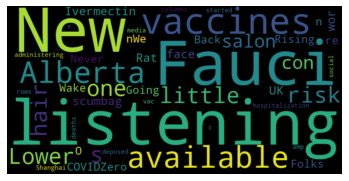

In [9]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
print(text)

                                                  Tweet
0     Lower your little one’s risk of #COVID19. Get ...
1     I'm at the hair salon and listening to the con...
2     #Ivermectin Rat face scumbag #Fauci is the wor...
3       Listening #UK #COVID19 #COVIDZero #CovidVaccine
4     😱Wake Up Folks!\n\nWe’re Never Going Back to O...
...                                                 ...
996   New COVID-19 vaccines available to Alberta and...
997   Fauci to be deposed in COVID-19 social media c...
998   Fauci to be deposed in COVID-19 social media c...
999   First Dose Progress 💉 :\n⬛⬛⬛⬛⬛⬛⬛⬛⬛⬜⬜⬜ 79.04%\n...
1000  Fauci to be deposed in COVID-19 social media c...

[1001 rows x 1 columns]


In [10]:
!pip install transformers

In [51]:
from transformers import pipeline
sentiment_analysis = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [52]:
tweet_sa = []
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [60]:
# Predicting the sentiments of tweets
for i, tweet in enumerate(q.get_items()):
    if i>500:
        print(i)
        break
    content = tweet.content
    content = preprocess(content)
    sentiment = sentiment_analysis(content)
    tweet_sa.append({"Date Created": tweet.date, "Number of Likes": tweet.likeCount, 
                     "Source of Tweet": tweet.sourceLabel, "Tweet": tweet.content, 'Sentiment': sentiment[0]['label']})

<ipython-input-60-61ff903468fe>:6: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  content = tweet.content
<ipython-input-60-61ff903468fe>:10: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  "Source of Tweet": tweet.sourceLabel, "Tweet": tweet.content, 'Sentiment': sentiment[0]['label']})


KeyboardInterrupt: ignored